In [15]:
#install.packages('dplyr')
#install.packages('quantmod')
#install.packages('ggplot2')
#install.packages('reshape2')
#install.packages('tidyquant')
#install.packages('tseries')


In [16]:
library(dplyr)
library(ggplot2)
library(quantmod)
library(reshape2)
library(tidyquant)

In [17]:
# Import the data and look at the first six rows
ASX200_data <- read.csv(file = 'C:/Users/humay/Downloads/ASX200.csv')
ASX200_data$Date <- as.Date(ASX200_data$Date, format = "%m/%d/%Y")
head(ASX200_data)
colnames(ASX200_data)

Month.of.Date,Date,ASX200,X10.AED,X10.CNY,X10.000.IDR,X100.INR,X100.JPY,X1000.KRW,AU.10yr,...,Shanghai,Singapore.1yr,Singapore.30yr,Swiss.1yr,Swiss.30yr,UK.1yr,UK.30yr,US.1yr,US.30yr,USD
July 2010,2010-07-01,4238,0.30724,0.56739,0.7609,0.3904,0.7390,1.02580,5.10,...,2374,0.35,2.98,0.49,1.81,0.71,4.12,0.31,3.90,0.8366
July 2010,2010-07-02,4239,0.31025,0.57224,0.7650,0.3943,0.7433,1.03387,5.12,...,2383,0.35,2.97,0.47,1.81,0.72,4.12,0.31,3.95,0.8448
July 2010,2010-07-03,4239,0.31025,0.57224,0.7650,0.3943,0.7433,1.03387,5.12,...,2383,0.35,2.97,0.47,1.81,0.72,4.12,0.31,3.95,0.8448
July 2010,2010-07-04,4239,0.31025,0.57224,0.7650,0.3943,0.7433,1.03387,5.12,...,2383,0.35,2.97,0.47,1.81,0.72,4.12,0.31,3.95,0.8448
July 2010,2010-07-05,4222,0.31018,0.57217,0.7655,0.3944,0.7429,1.03235,5.07,...,2364,0.35,2.99,0.57,1.80,0.69,4.09,0.31,3.95,0.8446
July 2010,2010-07-06,4276,0.30919,0.57050,0.7636,0.3941,0.7389,1.02956,5.05,...,2409,0.36,2.99,0.54,1.80,0.68,4.13,0.31,3.89,0.8419


[1] "Month.of.Date"  "Date"           "ASX200"         "X10.AED"       
 [5] "X10.CNY"        "X10.000.IDR"    "X100.INR"       "X100.JPY"      
 [9] "X1000.KRW"      "AU.10yr"        "AU.1yr"         "CAC40"         
[13] "China.1yr"      "China.30yr"     "DAX"            "Dow.Jones"     
[17] "EUR"            "FED.rate"       "FTSE100"        "GBP"           
[21] "Germany.1yr"    "Germany.30yr"   "Hang.Seng"      "Hong.Kong.10yr"
[25] "Hong.Kong.1yr"  "Japan.1yr"      "Japan.30yr"     "Korea.1yr"     
[29] "Korea.20yr"     "NASDAQ"         "Nikkei.225"     "RBA.rate"      
[33] "S.P500"         "SGD"            "Shanghai"       "Singapore.1yr" 
[37] "Singapore.30yr" "Swiss.1yr"      "Swiss.30yr"     "UK.1yr"        
[41] "UK.30yr"        "US.1yr"         "US.30yr"        "USD"

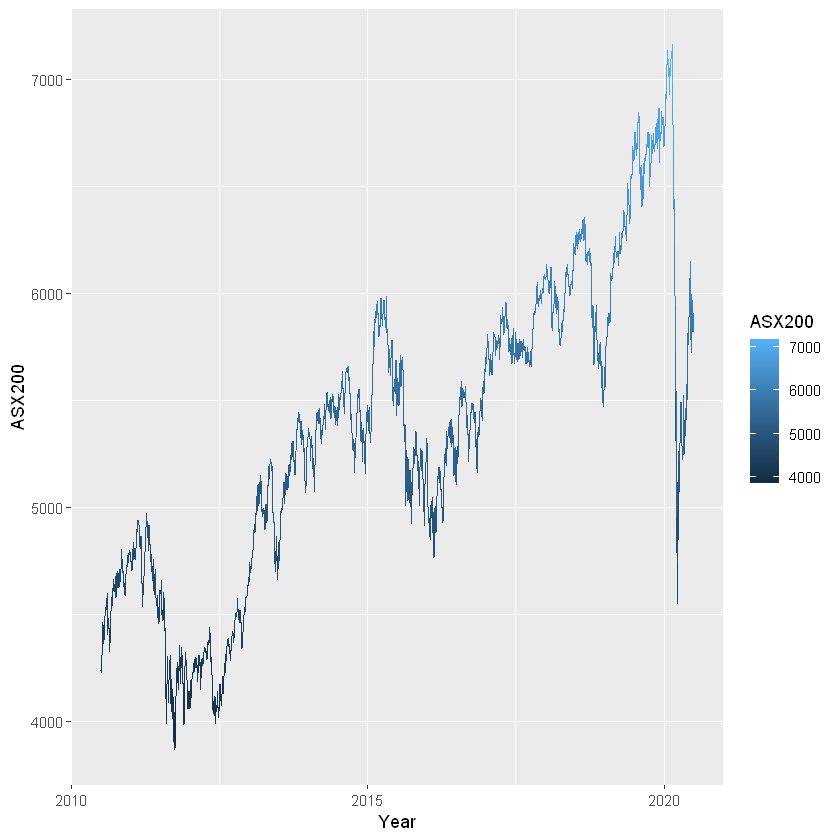

In [18]:
q <-ggplot(ASX200_data,aes(x = Date, y = ASX200,color=ASX200)) + 
         geom_line() +
         labs(x = "Year", y = "ASX200")
q

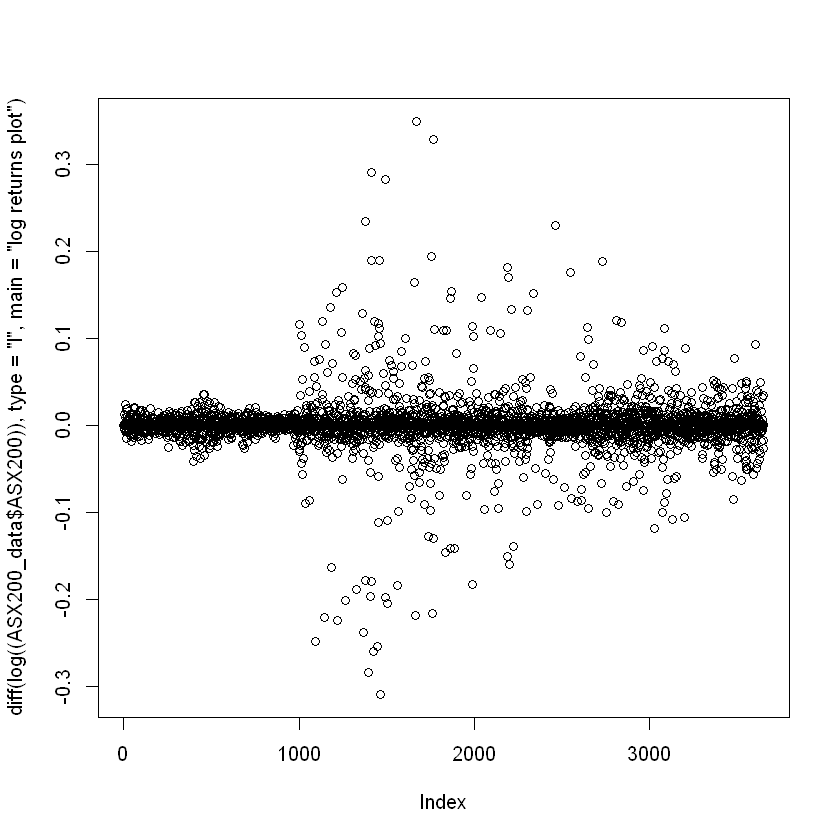

In [29]:
plot(diff(log((ASX200_data$ASX200)),type='l', main='log returns plot'))

In [28]:
#ARIMA modeling boils down to five parts:
#1.Visualize the time series
#2.Stationarize the time series
#3.Plot ACF/PACF and find optimal parameters
#4.Build the ARIMA model
#5.Make predictions.

## Stationarize the Time Series

In [20]:
library(tseries)
adf.test(diff(log(ASX200_data$ASX200)), alternative="stationary", k=0)

Warning message:
"package 'tseries' was built under R version 3.6.3"Warning message in adf.test(diff(log(ASX200_data$ASX200)), alternative = "stationary", :
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(log(ASX200_data$ASX200))
Dickey-Fuller = -70.195, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


## ACF/PACF

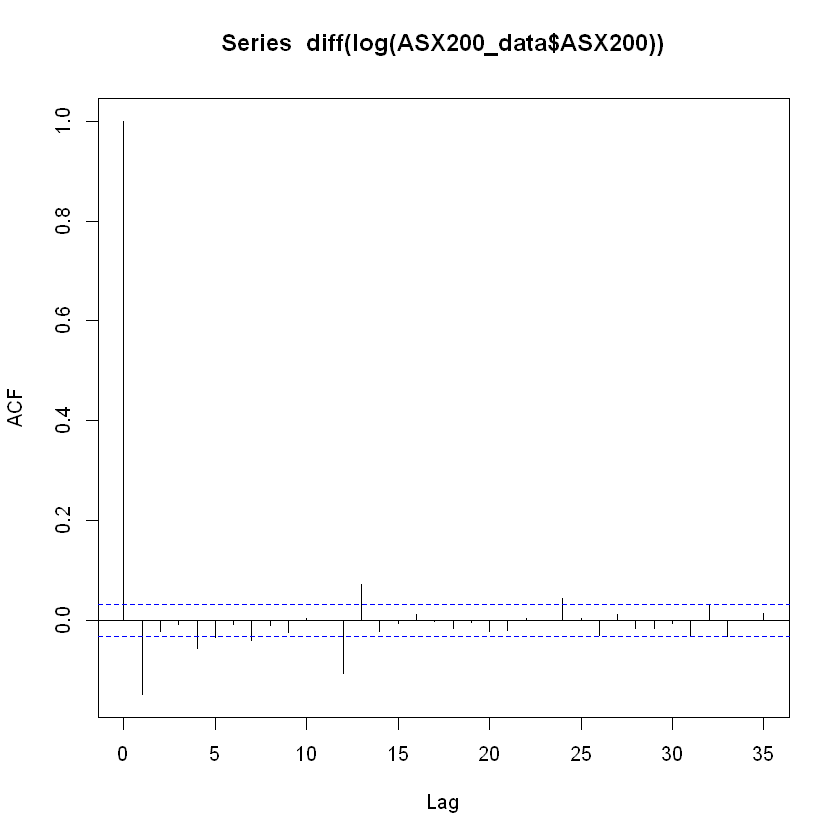

In [21]:
acf(diff(log(ASX200_data$ASX200)))

## Build the ARIMA Model

In [22]:
library(forecast)

Warning message:
"package 'forecast' was built under R version 3.6.3"

In [23]:
(fit <- arima(diff(log(ASX200_data$ASX200)), c(3, 0, 1)))


Call:
arima(x = diff(log(ASX200_data$ASX200)), order = c(3, 0, 1))

Coefficients:
         ar1     ar2      ar3      ma1  intercept
      0.7885  0.0938  -0.0056  -0.9810      0e+00
s.e.  0.0170  0.0210   0.0168   0.0039      1e-04

sigma^2 estimated as 0.0009274:  log likelihood = 7568.92,  aic = -15125.84

In [24]:
fitARIMA <- auto.arima(diff(log(ASX200_data$ASX200)), trace=TRUE)


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : -15123.62
 ARIMA(0,0,0) with non-zero mean : -14915.65
 ARIMA(1,0,0) with non-zero mean : -14994.91
 ARIMA(0,0,1) with non-zero mean : -15002.77
 ARIMA(0,0,0) with zero mean     : -14917.64
 ARIMA(1,0,2) with non-zero mean : -15125.81
 ARIMA(0,0,2) with non-zero mean : -15005.11
 ARIMA(1,0,1) with non-zero mean : -15100.24
 ARIMA(1,0,3) with non-zero mean : -15125.36
 ARIMA(0,0,3) with non-zero mean : -15007.7
 ARIMA(2,0,1) with non-zero mean : -15125.56
 ARIMA(2,0,3) with non-zero mean : Inf
 ARIMA(1,0,2) with zero mean     : -15127.59
 ARIMA(0,0,2) with zero mean     : -15007.1
 ARIMA(1,0,1) with zero mean     : -15102.04
 ARIMA(2,0,2) with zero mean     : -15125.4
 ARIMA(1,0,3) with zero mean     : -15127.15
 ARIMA(0,0,1) with zero mean     : -15004.77
 ARIMA(0,0,3) with zero mean     : -15009.7
 ARIMA(2,0,1) with zero mean     : -15127.34
 ARIMA(2,0,3) with zero mean     : Inf

 Now re-f

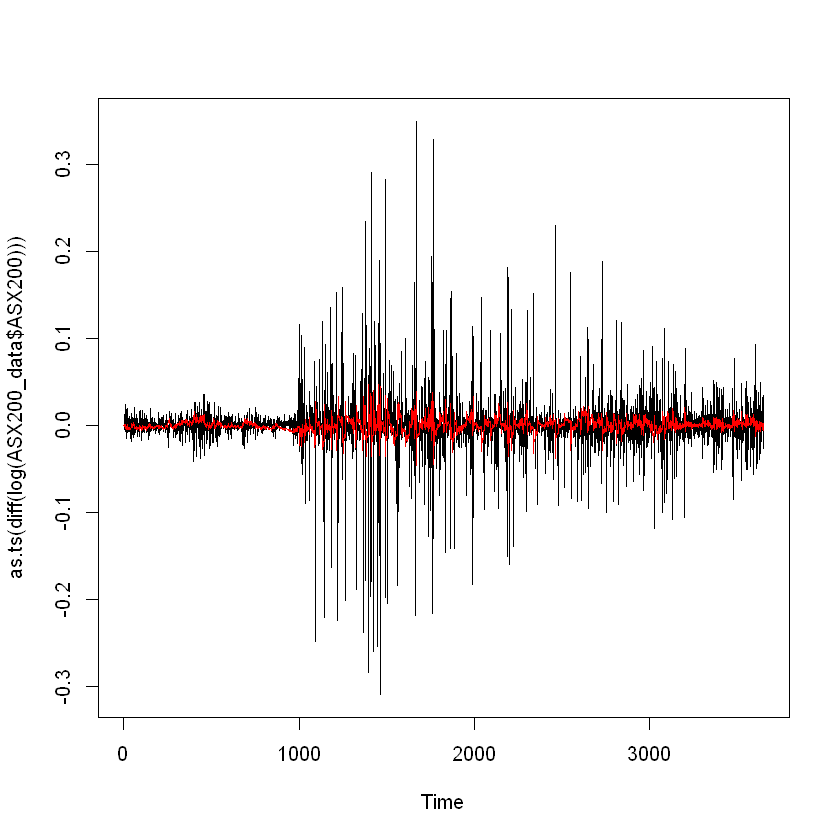

In [25]:
plot(as.ts(diff(log(ASX200_data$ASX200))) )
lines(fitted(fitARIMA), col="red")

## Make Predictions

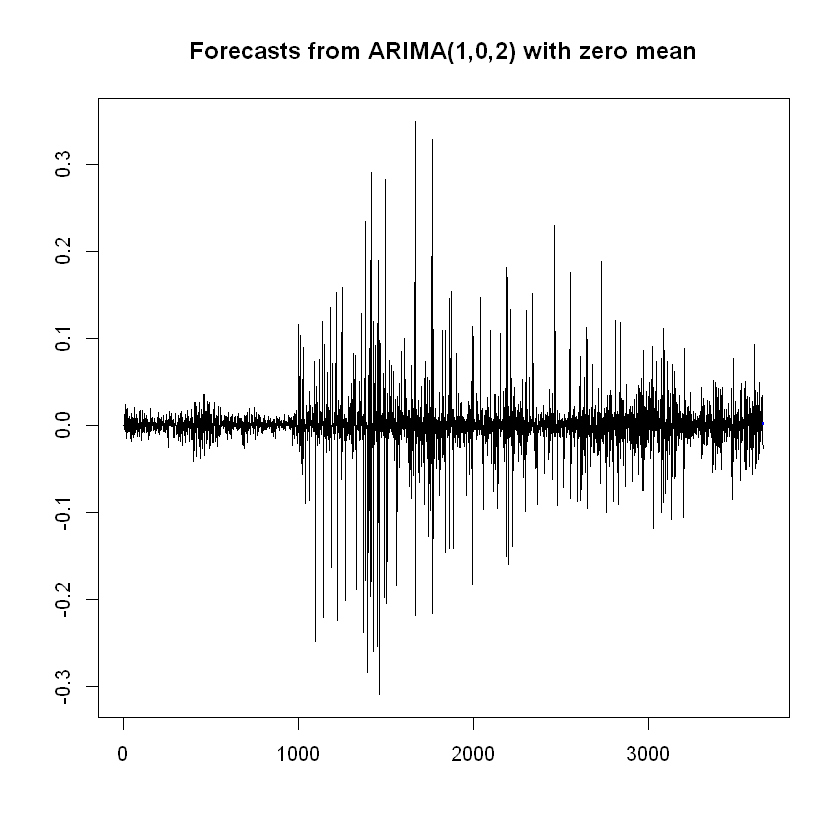

In [26]:
futurVal <- forecast(fitARIMA,h=5, level=c(99)) #confidence level 99%
plot(forecast(futurVal))